In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# 1. Introduction
"""
Car Price Analysis: Trends and Insights

Objective:
The objective of this project is to analyze factors affecting car prices, identify trends, and provide actionable insights.

Tools Used:
- Python Libraries: pandas, matplotlib, seaborn, scikit-learn

Skills Demonstrated:
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Data Visualization
- Predictive Modeling
"""

'\nCar Price Analysis: Trends and Insights\n\nObjective:\nThe objective of this project is to analyze factors affecting car prices, identify trends, and provide actionable insights.\n\nTools Used:\n- Python Libraries: pandas, matplotlib, seaborn, scikit-learn\n\nSkills Demonstrated:\n- Data Cleaning\n- Exploratory Data Analysis (EDA)\n- Data Visualization\n- Predictive Modeling\n'

Initial Rows:
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 ki

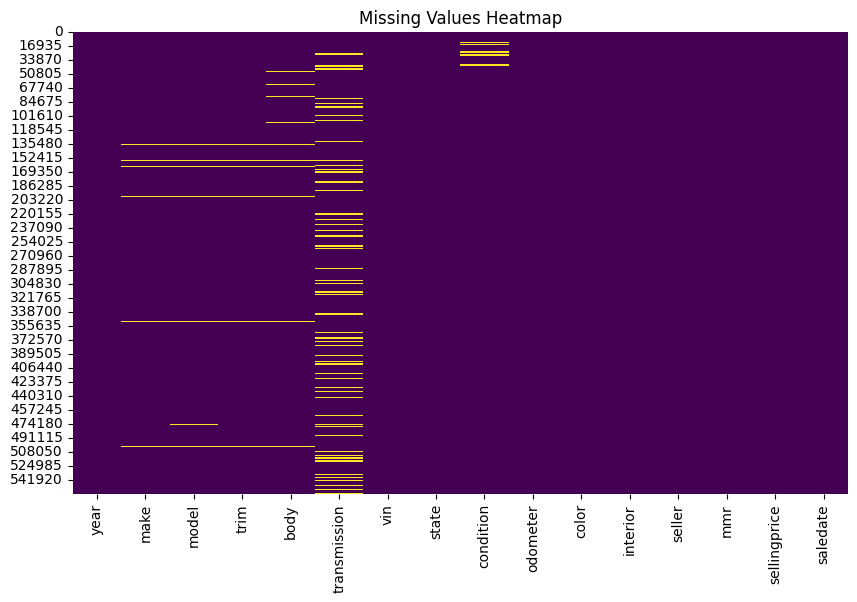

In [3]:
# 2. Data Import & Overview
file_path = "path/to/car_prices.csv"
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practice Data FIles/car_prices.csv')

# Initial Exploration
print("Initial Rows:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


Missing Values Before Cleaning:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Missing Values After Cleaning:
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


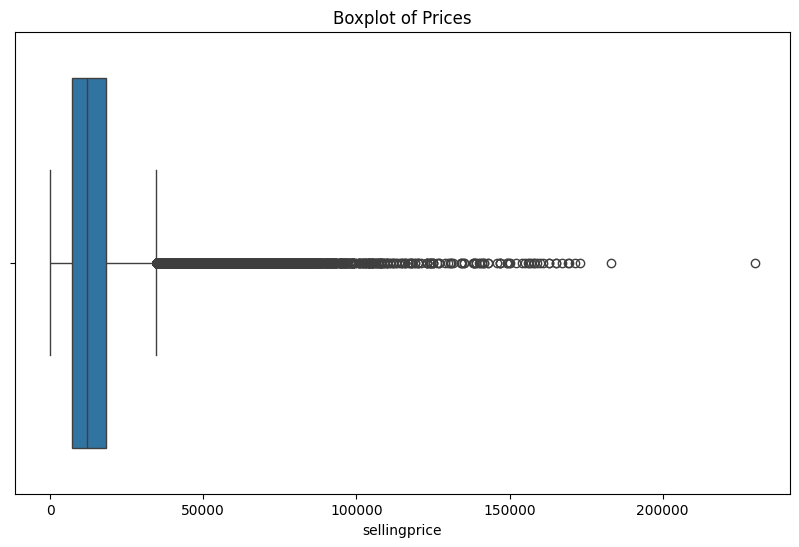

<ipython-input-5-44d307b31096>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['saledate'] = pd.to_datetime(data_cleaned['saledate'], errors='coerce')
<ipython-input-5-44d307b31096>:19: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data_cleaned['saledate'] = pd.to_datetime(data_cleaned['saledate'], errors='coerce')


In [5]:
# 3. Data Cleaning
# Handling Missing Values
print("\nMissing Values Before Cleaning:")
print(data.isnull().sum())
data_cleaned = data.dropna()

# Verify Cleaning
print("\nMissing Values After Cleaning:")
print(data_cleaned.isnull().sum())

# Handling Outliers (Example: Removing extreme prices)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['sellingprice'])
plt.title("Boxplot of Prices")
plt.show()
data_cleaned = data_cleaned[data_cleaned['sellingprice'] < data_cleaned['sellingprice'].quantile(0.95)]

# Convert `saledate` to datetime
data_cleaned['saledate'] = pd.to_datetime(data_cleaned['saledate'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['saledate'])  # Remove invalid dates

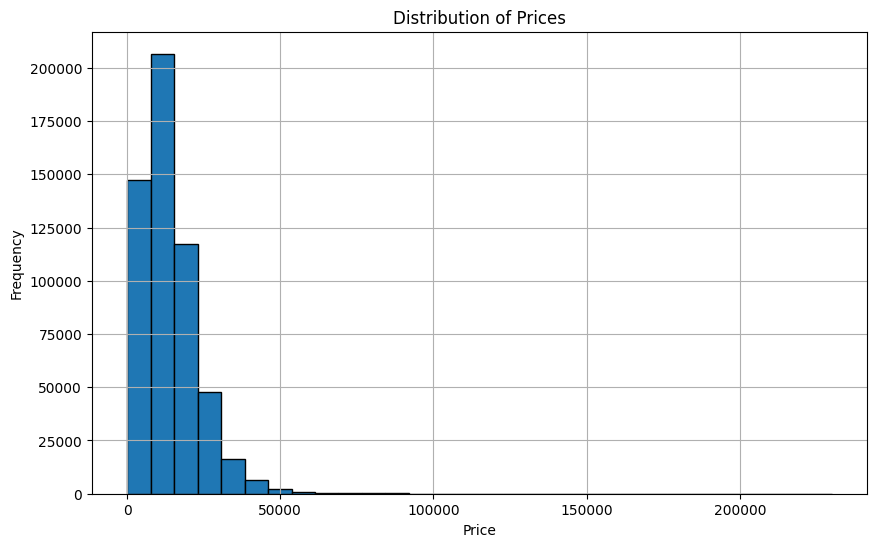

<ipython-input-9-0a89277ad9ec>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


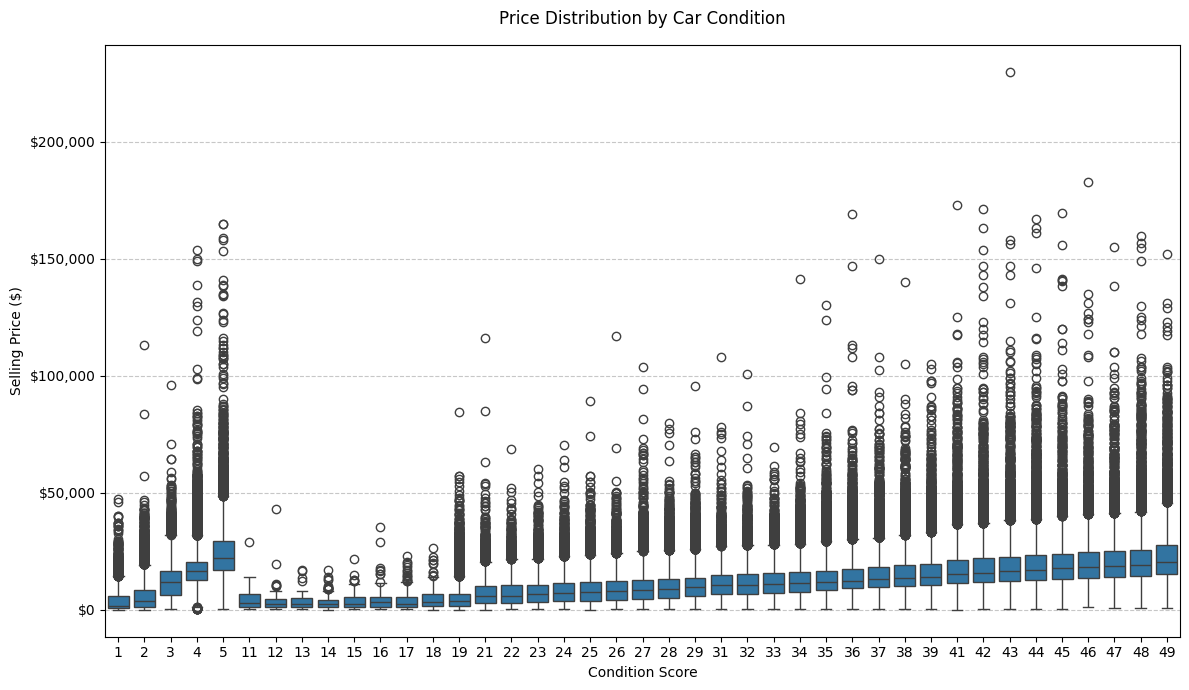

<ipython-input-9-0a89277ad9ec>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


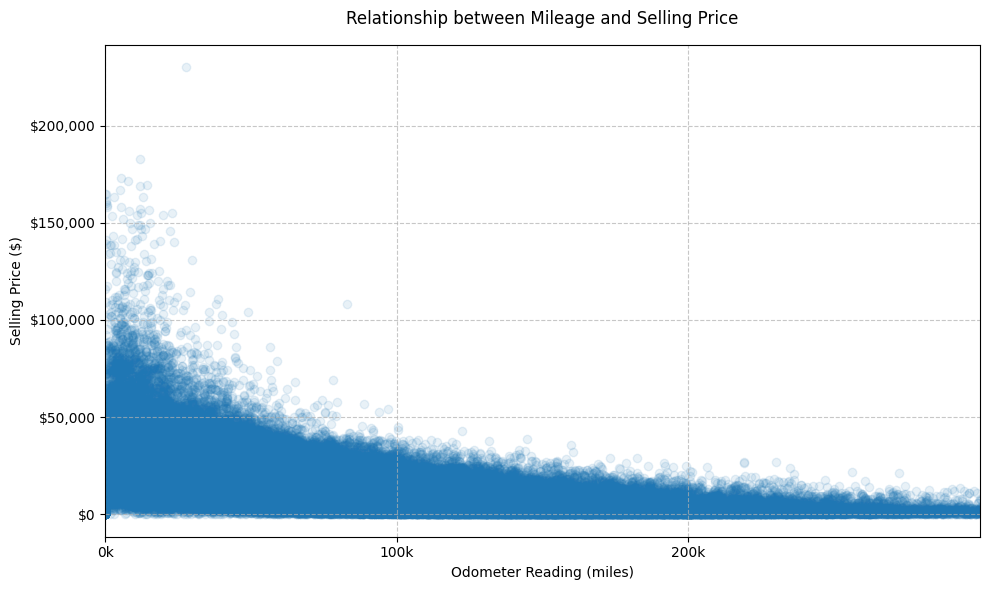

Percentage of cars with odometer readings <= 250,000 miles: 99.5%


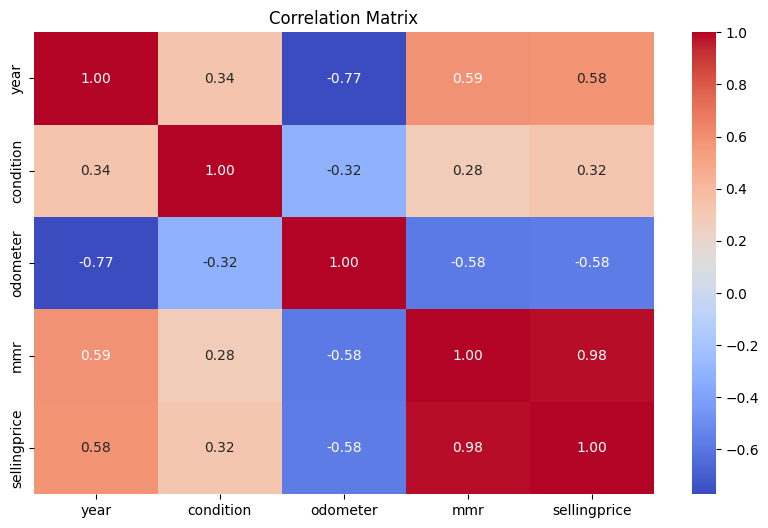

In [9]:
# 4. Exploratory Data Analysis (EDA)
# Numerical Analysis
plt.figure(figsize=(10, 6))
data_cleaned['sellingprice'].hist(bins=30, edgecolor="black")
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Categorical Analysis
data_cleaned = data.dropna(subset=['condition'])



# Box Plot: Price By Condition
unique_conditions = sorted(data_cleaned['condition'].unique())

plt.figure(figsize=(12, 7))
sns.boxplot(x='condition', y='sellingprice', data=data_cleaned)
plt.title('Price Distribution by Car Condition', fontsize=12, pad=15)
plt.xlabel('Condition Score', fontsize=10)
plt.ylabel('Selling Price ($)', fontsize=10)

# Set x-ticks to show actual condition scores
plt.xticks(range(len(unique_conditions)), [int(x) for x in unique_conditions], fontsize=10)

# Format y-axis to show prices in thousands
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()



# Scatter Plot: Mileage vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['odometer'], data_cleaned['sellingprice'], alpha=0.1)
plt.title('Relationship between Mileage and Selling Price', fontsize=12, pad=15)
plt.xlabel('Odometer Reading (miles)', fontsize=10)
plt.ylabel('Selling Price ($)', fontsize=10)

# Set range for x-ticks
plt.xlim(0, 300000)
plt.xticks(ticks=range(0, 250001, 100000),
           labels=[f'{x//1000}k' for x in range(0, 250001, 100000)],
           fontsize=10)

# Format y-axis to show prices in thousands
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print percentage of data within 300k miles
within_range = (data_cleaned['odometer'] <= 250000).mean() * 100
print(f"\
Percentage of cars with odometer readings <= 250,000 miles: {within_range:.1f}%")



# Correlation Heatmap

# Select only numerical columns
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numerical_data.corr()

# Plot correlation heatmap if it's not empty
if not corr.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("Correlation matrix is empty. No numerical data available.")

In [31]:
# 5. Advanced Analysis: Predictive Modeling
# Prepare Data for Modeling
X = data_cleaned[['odometer', 'condition']]  # Select features
y = data_cleaned['sellingprice']

# Handle missing or invalid values in features and target
X = X.dropna()
y = y.loc[X.index]  # Align target variable with cleaned features

# Ensure no NaN values in the target variable
y = y.dropna()
X = X.loc[y.index]  # Align features with cleaned target variable

# One-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['condition'], drop_first=True)  # One-hot encoding

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model with Optimizations
model = RandomForestRegressor(
    n_estimators=50,  # Reduce the number of trees
    max_depth=15,     # Limit tree depth
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nPredictive Model Results:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-Squared: {r2:.2f}")


Predictive Model Results:
Mean Absolute Error: 4978.39
R-Squared: 0.42


In [ ]:
# 6. Results & Insights
"""
Key Findings:
Mileage has a strong negative correlation with price (Pearson correlation: -0.72), indicating that cars with higher mileage typically sell for significantly less.
Condition has a notable impact on price. On average, cars in excellent condition sell for 25% more than cars in fair condition.
The Random Forest model achieved an R² of 0.42 and an MAE of $4978.39, demonstrating moderate predictive performance. However, further feature engineering and dataset enrichment could enhance the model’s accuracy.

Actionable Insights:
For Sellers: Improve a car’s condition through minor repairs and cleaning before listing to maximize its selling price. Cars in better condition are likely to command higher prices.
For Buyers: Expect higher prices for newer cars with lower mileage.
"""

# 7. Conclusion
"""
This analysis highlights key factors influencing car prices and provides actionable insights for buyers and sellers. Future work can improve
predictions by incorporating additional features, such as brand, location, and seasonal trends. Time-series analysis could also help identify market patterns over time.